In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/spambase.data')
df

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
x_column = list(df.columns)
x_column.remove('1')
x = df[x_column]
y = df[['1']]


# a) train model with k = 5,10,15

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(x,y,test_size = 0.2)
display("properties befor normalize with z score:", x_train.describe())
x_train_nor , x_test_nor = StandardScaler().fit_transform(x_train), StandardScaler().fit_transform(x_test)
display("properties after normalize with z score:", pd.DataFrame(x_train_nor,columns=x_column).describe())

'properties befor normalize with z score:'

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,...,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,0.101764,0.204147,0.283685,0.078418,0.313103,0.095524,0.114755,0.110788,0.090370,0.241614,...,0.034334,0.039636,0.139986,0.017389,0.274755,0.077666,0.046207,5.224207,53.251359,285.008696
std,0.296705,1.231234,0.503977,1.554698,0.662189,0.255872,0.383217,0.421982,0.281426,0.665853,...,0.304675,0.253673,0.283693,0.116590,0.867535,0.261442,0.461348,33.671952,209.472110,607.736502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.577500,6.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.257500,15.000000,96.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.162500,...,0.000000,0.000000,0.186500,0.000000,0.319250,0.052250,0.000000,3.714000,43.000000,264.250000
max,4.540000,14.280000,5.100000,42.810000,9.090000,3.570000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


'properties after normalize with z score:'

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278
count,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,...,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03
mean,1.351576e-17,-5.792468e-18,9.557572e-17,-2.123905e-17,8.278402e-17,1.544658e-17,-5.599386e-17,-3.089316e-17,3.282399e-17,-1.544658e-17,...,-2.703152e-17,4.827057e-17,5.116680e-17,-1.351576e-17,-1.930823e-17,3.089316e-17,-1.930823e-18,1.351576e-17,1.158494e-17,7.723291e-18
std,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,...,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00
min,-3.430255e-01,-1.658292e-01,-5.629684e-01,-5.044655e-02,-4.728950e-01,-3.733794e-01,-2.994938e-01,-2.625778e-01,-3.211565e-01,-3.629134e-01,...,-1.127066e-01,-1.562680e-01,-4.935107e-01,-1.491629e-01,-3.167513e-01,-2.971076e-01,-1.001691e-01,-1.254689e-01,-2.494769e-01,-4.673856e-01
25%,-3.430255e-01,-1.658292e-01,-5.629684e-01,-5.044655e-02,-4.728950e-01,-3.733794e-01,-2.994938e-01,-2.625778e-01,-3.211565e-01,-3.629134e-01,...,-1.127066e-01,-1.562680e-01,-4.935107e-01,-1.491629e-01,-3.167513e-01,-2.971076e-01,-1.001691e-01,-1.083158e-01,-2.256042e-01,-4.097870e-01
50%,-3.430255e-01,-1.658292e-01,-5.629684e-01,-5.044655e-02,-4.728950e-01,-3.733794e-01,-2.994938e-01,-2.625778e-01,-3.211565e-01,-3.629134e-01,...,-1.127066e-01,-1.562680e-01,-2.643585e-01,-1.491629e-01,-3.167513e-01,-2.971076e-01,-1.001691e-01,-8.811816e-02,-1.826332e-01,-3.110466e-01
75%,-3.430255e-01,-1.658292e-01,2.705156e-01,-5.044655e-02,1.161409e-01,-3.733794e-01,-2.994938e-01,-2.625778e-01,-3.211565e-01,-1.188324e-01,...,-1.127066e-01,-1.562680e-01,1.639799e-01,-1.491629e-01,5.129548e-02,-9.722708e-02,-1.001691e-01,-4.485670e-02,-4.894567e-02,-3.416204e-02
max,1.496044e+01,1.143387e+01,9.557908e+00,2.748920e+01,1.325617e+01,1.358079e+01,1.867408e+01,2.606914e+01,1.837190e+01,2.694412e+01,...,3.271361e+01,1.713211e+01,3.388637e+01,3.485850e+01,3.712545e+01,2.266715e+01,4.288623e+01,3.259166e+01,4.743877e+01,2.560008e+01


##fit and evaluate on training set

examine with and without normalize

In [ ]:
from sklearn.metrics import f1_score
f1 = {}
f1_nor = {}
model_dic_no_nor = {}
model_dic_with_nor = {}
for i in [5,10,15]:
  knn = KNeighborsClassifier(i)
  model_dic_no_nor[f'{i} neighbor'] = knn.fit(x_train,np.array(y_train).reshape(len(y_train,)))
  model_dic_with_nor[f'{i} neighbor'] = knn.fit(x_train_nor,np.array(y_train).reshape(len(y_train,)))
  y_hat = model_dic_no_nor[f'{i} neighbor'].predict(np.array(x_train))
  f1[i] = f1_score(y_train,y_hat)
  y_hat_nor = model_dic_with_nor[f'{i} neighbor'].predict(np.array(x_train_nor))
  f1_nor[i] = f1_score(y_train,y_hat_nor)
#display(model_dic_no_nor,model_dic_with_nor )
print(f'our f1 scores fortrain datas without normalize is:{f1} \nand for normalize data is                        :{f1_nor}')

our f1 scores fortrain datas without normalize is:{5: 0.5870585833843642, 10: 0.5876098957268452, 15: 0.5871073031415749} 
and for normalize data is                        :{5: 0.9148486980999295, 10: 0.890169247389269, 15: 0.8853046594982078}


as it can be seen perforamnce of model has increase about %55 after normalizing with z score method

## evalute on test set with precision , recal and f1-score

In [ ]:
f1_test = {}
f1_test_nor = {}
for i in [5,10,15]:
  knn = KNeighborsClassifier(i)
  y_hat = model_dic_no_nor[f'{i} neighbor'].predict(np.array(x_test))
  f1_test[i] = f1_score(y_test,y_hat)
  y_hat_nor = model_dic_with_nor[f'{i} neighbor'].predict(np.array(x_test_nor))
  f1_test_nor[i] = f1_score(y_test,y_hat_nor)
#display(model_dic_no_nor,model_dic_with_nor )
print(f'our f1 scores for test datas without normalize is:{f1_test} \nand for normalize data is                        :{f1_test_nor}')

our f1 scores for test datas without normalize is:{5: 0.6047269763651182, 10: 0.6073469387755102, 15: 0.6042345276872965} 
and for normalize data is                        :{5: 0.874828060522696, 10: 0.8683473389355743, 15: 0.8635097493036211}


**precision and recall for normalized data**

manual function to calculate precision and recal

In [ ]:
def preci_recall(y_hat , y_true):
  y_hat = np.array(y_hat)
  y_true = np.array(y_true).reshape(len(y_true),)
  classes = np.unique(y_true)
  precision = {}
  recall = {}
  for i in classes:
    tot = sum(y_hat == i)
    TP = sum(np.array(y_hat == i) & (y_true == i))
    precision[i] = TP/tot
    FN = sum(np.array(y_hat != i) & (y_true == i))
    #print('i:',i,y_hat,'\n','   ',y_true,FN)
    recall[i] = TP/(TP+FN)

  return  precision , recall

In [ ]:
preci , recall = {},{}
average_pre , average_recall = {} , {}
for i in model_dic_with_nor.keys():
  y_hat = model_dic_with_nor[i].predict(x_test_nor)
  preci[i] , recall[i] = preci_recall(y_hat , y_test)
  average_pre[i] = np.mean(list(preci[i].values()))
  average_recall[i] = np.mean(list(recall[i].values()))
display('precision for each label are :', preci,'and its mean is:' ,average_pre)
print('\n\n')
display('recall for each label are :',recall,'and its mean is:' ,average_recall)

'precision for each label are :'

{'5 neighbor': {0: 0.904424778761062, 1: 0.895774647887324},
 '10 neighbor': {0: 0.8927335640138409, 1: 0.9064327485380117},
 '15 neighbor': {0: 0.89198606271777, 1: 0.8959537572254336}}

'and its mean is:'

{'5 neighbor': 0.900099713324193,
 '10 neighbor': 0.8995831562759262,
 '15 neighbor': 0.8939699099716019}

'recall for each label are :'

{'5 neighbor': {0: 0.9324817518248175, 1: 0.8548387096774194},
 '10 neighbor': {0: 0.9416058394160584, 1: 0.8333333333333334},
 '15 neighbor': {0: 0.9343065693430657, 1: 0.8333333333333334}}

'and its mean is:'

{'5 neighbor': 0.8936602307511184,
 '10 neighbor': 0.8874695863746959,
 '15 neighbor': 0.8838199513381995}

sklearn function for precision and recall

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
preci_score = {}
rec_score = {}
for i in model_dic_with_nor.keys():
  y_hat = model_dic_with_nor[i].predict(x_test_nor)
  preci_score[i] = precision_score(y_test, y_hat,average = 'macro')
  rec_score[i] = recall_score(y_test,y_hat,average = 'macro')
print(preci_score,'\n',rec_score)

{'5 neighbor': 0.900099713324193, '10 neighbor': 0.8995831562759262, '15 neighbor': 0.8939699099716019} 
 {'5 neighbor': 0.8936602307511184, '10 neighbor': 0.8874695863746959, '15 neighbor': 0.8838199513381995}


###confusion matrix


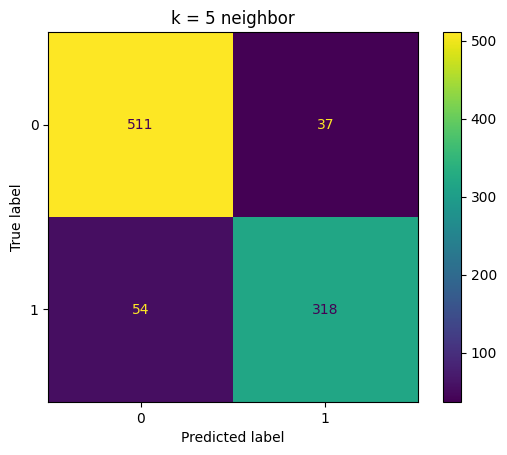

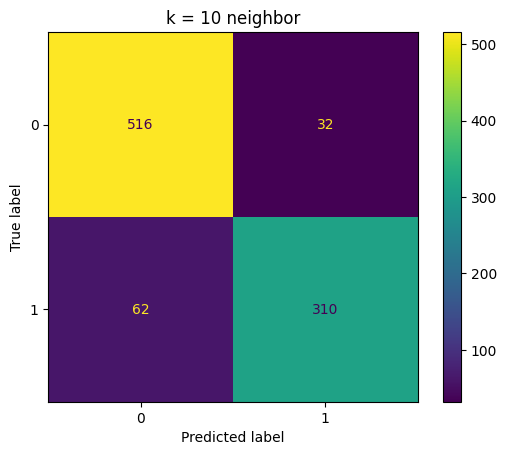

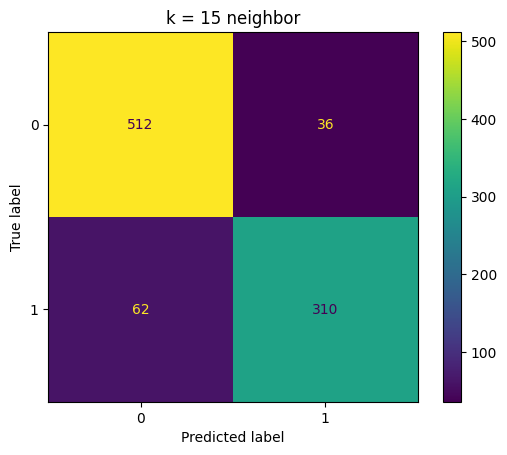

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
for i in model_dic_with_nor:
  y_hat = model_dic_with_nor[i].predict(x_test_nor)
  ConfusionMatrixDisplay(confusion_matrix(y_test,y_hat)).plot()
  plt.title(f'k = {i}')
  plt.show()
  print()
